In [2]:




import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def load_json(file_path):
    with open(f"{file_path}") as f:
        data = json.load(f)
    return data

def load_csv(file_path):
    with open(file_path, "r") as f:
        # split by ;
        data = f.readlines()
        header = data[0].split(";")
        data = [line.split(";") for line in data[1:]]
        data = [dict(zip(header, line)) for line in data]
    return data


def id_to_initial_context(id: str) -> str:
    # 204-590 -> csv/204-csv/590.csv
    splitted_id = id.split("-")
    return f"csv/{splitted_id[0]}-csv/{splitted_id[1]}.csv"


# load "data/evaluation/dataset_analysis/analysis-2025-02-25-15-42-34.json"
path = "../data/wiki_table_questions/id_mapper_questions.json"
data = load_json(path)
questions_path = "../data/wiki_table_questions/all_training_questions.csv"
questions = pd.read_csv(filepath_or_buffer=questions_path, sep=";")
questions.fillna("", inplace=True)

id_list = [doc["question_id"] for doc in data]

# questions to dict
questions = questions.to_dict(orient="records")
questions_filtered = [q for q in questions if q["id"] in id_list]
print(questions)






[{'id': 'nt-0', 'utterance': 'what was the last year where this team was a part of the usl a-league?', 'context': 'csv/204-csv/590.csv', 'targetValue': '2004'}, {'id': 'nt-1', 'utterance': "in what city did piotr's last 1st place finish occur?", 'context': 'csv/204-csv/622.csv', 'targetValue': 'Bangkok, Thailand'}, {'id': 'nt-2', 'utterance': 'which team won previous to crettyard?', 'context': 'csv/204-csv/772.csv', 'targetValue': 'Wolfe Tones'}, {'id': 'nt-3', 'utterance': 'how many more passengers flew to los angeles than to saskatoon from manzanillo airport in 2013?', 'context': 'csv/203-csv/515.csv', 'targetValue': '12,467'}, {'id': 'nt-4', 'utterance': 'who was the opponent in the first game of the season?', 'context': 'csv/204-csv/495.csv', 'targetValue': 'Derby County'}, {'id': 'nt-5', 'utterance': 'how many people stayed at least 3 years in office?', 'context': 'csv/203-csv/705.csv', 'targetValue': '4'}, {'id': 'nt-6', 'utterance': 'who is the first away team on the chart', 'co

In [1]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in data]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "position related"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Position Related"]
category_counts = [categories.count(cat) for cat in unique_categories]
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 5, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_wiki_tables.pdf", bbox_inches='tight')

NameError: name 'plt' is not defined

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_46590/4122736595.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_domains))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_46590/4122736595.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_46590/4122736595.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


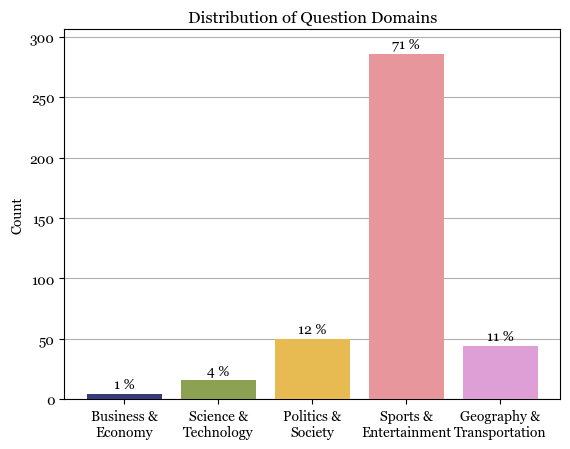

In [ ]:
# plot the distribution of domains
# also show the percentage of the domains as numbers
domains = [doc["domain"] for doc in data]
unique_domains = ["business & economy", "science & technology", "politics & society", "sports & entertainment", "geography & transportation"]
domain_counts = [domains.count(domain) for domain in unique_domains]
domain_percentages = [count / len(domains) for count in domain_counts]


# Wrap labels if they are too long
labels = ["Business & Economy", "Science & Technology", "Politics & Society", "Sports &   Entertainment", "Geography &  Transportation"]
wrapped_labels = [textwrap.fill(label, 14) for label in labels]

# Define colors for each domain
colors = cm.get_cmap('tab20b', len(unique_domains))

fig, ax = plt.subplots()
bars = ax.bar(unique_domains, domain_counts, color=[colors(i) for i in range(len(unique_domains))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Domains", fontname='Georgia')
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(domain_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, domain in enumerate(unique_domains):
    ax.text(i, domain_counts[i] + 5, f"{int(domain_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing
    
ax.yaxis.grid(True, zorder=0)
plt.show()

# save figure to pdf
fig.savefig("../data/results/distribution_of_question_domains_wikitables.pdf", bbox_inches='tight')

In [3]:
document_summary_path = "../data/evaluation/dataset_analysis/analysis-2025-03-09-13-21-25.json"
document_summary = load_json(document_summary_path)


# 0: html, 1: plain text, # 2: csv
document_list = document_summary[0]['dataset_summary']['document_list']
html_documents = document_summary[0]['dataset_summary']
plain_text_documents = document_summary[1]['dataset_summary']
csv_documents = document_summary[2]['dataset_summary']
tabtree_text = document_summary[3]['dataset_summary']

table_summary = document_summary[0]['dataset_summary']['table_statistics']

# num of documents
num_html = len(html_documents["document_list"])

# print table statistics
print("Table statistics:")
print(f"Number of HTML documents: {num_html}")


print("\nRows:")
print(f"  Avg: {table_summary["rows_statistics"]["avg"]}")
print(f"  Min: {table_summary["rows_statistics"]["min"]}")
print(f"  Max: {table_summary["rows_statistics"]["max"]}")
print(f"  Std: {table_summary["rows_statistics"]["std"]}")

print("\nColumns:")
print(f"  Avg: {table_summary["columns_statistics"]["avg"]}")
print(f"  Min: {table_summary["columns_statistics"]["min"]}")
print(f"  Max: {table_summary["columns_statistics"]["max"]}")
print(f"  Std: {table_summary["columns_statistics"]["std"]}")


print("\nCharacters:")
print(f"  Avg: {plain_text_documents["character_statistics"]["avg"]}")
print(f"  Min: {plain_text_documents["character_statistics"]["min"]}")
print(f"  Max: {plain_text_documents["character_statistics"]["max"]}")
print(f"  Std: {plain_text_documents["character_statistics"]["std"]}")

print("\nTokens HTML:")
print(f"  Avg: {html_documents["token_statistics"]["avg"]}")
print(f"  Min: {html_documents["token_statistics"]["min"]}")
print(f"  Max: {html_documents["token_statistics"]["max"]}")
print(f"  Std: {html_documents["token_statistics"]["std"]}")

print("\nTokens CSV:")
print(f"  Avg: {csv_documents["token_statistics"]["avg"]}")
print(f"  Min: {csv_documents["token_statistics"]["min"]}")
print(f"  Max: {csv_documents["token_statistics"]["max"]}")
print(f"  Std: {csv_documents["token_statistics"]["std"]}")

print("\nTokens TabTree Text:")
print(f"  Avg: {tabtree_text["token_statistics"]["avg"]}")
print(f"  Min: {tabtree_text["token_statistics"]["min"]}")
print(f"  Max: {tabtree_text["token_statistics"]["max"]}")
print(f"  Std: {tabtree_text["token_statistics"]["std"]}")



Table statistics:
Number of HTML documents: 400

Rows:
  Avg: 24.3975
  Min: 7
  Max: 196
  Std: 24.60557850874472

Columns:
  Avg: 6.52
  Min: 3
  Max: 17
  Std: 1.902524638473836

Characters:
  Avg: 1687.7125
  Min: 124
  Max: 18118
  Std: 2409.3779030786663

Tokens HTML:
  Avg: 1513.195
  Min: 265
  Max: 14549
  Std: 1775.557027238213

Tokens CSV:
  Avg: 790.5025
  Min: 101
  Max: 8210
  Std: 1013.4895214030335

Tokens TabTree Text:
  Avg: 7272.94
  Min: 385
  Max: 143478
  Std: 13572.545108283855
